## 👀 Scenario <a class="anchor" id="chapter1">
As a consultant working for a real estate start-up , I'm asked to look into the short-term rental market in New York , so I have gathered Airbnb listing data from several different sources. 

## ❓ About the project <a class="anchor" id="chapter2">
The objective of this project is to combine the different datasets gathered from the three sources into one dataset and clean it in order to analyze the airbnb listings and to calculate the metrics we are interested in.
The three files that are available contain data on 2019 Airbnb listings : 
 * The first dataset contains data on the prices and neighborhoods of Airbnbs.
 <h3 id="airbnb_price.csv"><code>Airbnb Prices</code></h3>
 
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| listing_id             |  unique identifier of listing  |
| price                | nightly listing price in USD.                 |
| nbhood_full             |  name of borough and neighborhood where listing is located. |   
  
 </div>
    
 * The second dataset contains data on the listing descriptions and room types
 <h3 id="airbnb_room_type.csv"><code>Airbnb Room Types</code></h3>
 
<div align="left">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| listing_id             |  unique identifier of listing  |
| description               | listing description               |
| room_type             |  Airbnb has 3 types of rooms : shared rooms,private rooms and entire rooms.|   
    
 </div>
    
    
    
     
 * The third dataset contains data on host names and review dates.
 <h3 id="airbnb_room_type.csv"><code>Airbnb Reviews</code></h3>
 
<div align="left">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| listing_id             |  unique identifier of listing  |
| host_name            | name of listing host              |
| last_review             |  date when the listing was last reviewed.|   
    
 </div>

In [205]:
# loading the libraries
library(dplyr)
library(tidyverse)
library(ggplot2)
library(readr)
library(readxl)
library(stringr)
library(tidyr)
library(data.table)
library(lubridate)
library(anytime)
library(huxtable)


Attaching package: 'huxtable'


The following object is masked from 'package:ggplot2':

    theme_grey


The following object is masked from 'package:dplyr':

    add_rownames




In [124]:
# loading prices dataset 
prices <- read.csv("airbnb_price.csv")
# laoding room types dataset 
room_types <- read_excel("airbnb_room_type.xlsx",sheet=1)
# loading reviews dataset
reviews <- read.csv("reviews.csv")

In [125]:
# viewing the datasets 
head(prices,1)
head(room_types,1)
head(reviews,1)

listing_id,price,nbhood_full
2595,225 dollars,"Manhattan, Midtown"


listing_id,description,room_type
2595,Skylit Midtown Castle,Entire home/apt


X,listing_id,host_name,last_review
1,2595,Jennifer,May 21 2019


In [126]:
str(prices)

'data.frame':	25209 obs. of  3 variables:
 $ listing_id : int  2595 3831 5099 5178 5238 5295 5441 5803 6021 6848 ...
 $ price      : Factor w/ 536 levels "0 dollars","10 dollars",..: 165 513 136 489 78 57 506 513 506 63 ...
 $ nbhood_full: Factor w/ 217 levels "Bronx, Allerton",..: 113 62 115 107 98 125 107 91 125 94 ...


## 1. Data Inspection and cleaning

#### 1.1  Cleaning the price column : so that we have the price and the currency in different columns.


In [127]:
# cleaning the price column 
prices <- prices %>%
separate(price,into=c("price","currency"),sep=" ") %>% 
mutate(price = as.numeric(price))
head(prices,1)
setDT(prices)

listing_id,price,currency,nbhood_full
2595,225,dollars,"Manhattan, Midtown"


#### 1.2   Filtering the free listings and removing them.

In [128]:
# subsetting prices for free listings 
free_listings <- prices[price == 0,]
free_listings

listing_id,price,currency,nbhood_full
20333471,0,dollars,"Bronx, East Morrisania"
20523843,0,dollars,"Brooklyn, Bushwick"
20639628,0,dollars,"Brooklyn, Bedford-Stuyvesant"
20639792,0,dollars,"Brooklyn, Bedford-Stuyvesant"
20639914,0,dollars,"Brooklyn, Bedford-Stuyvesant"
21291569,0,dollars,"Brooklyn, Bushwick"
21304320,0,dollars,"Brooklyn, Bushwick"


In [129]:
# Removing all free listings from prices 
prices <- prices[price != 0 ,]

## 2.Exploratory Data Analysis

#### 1. Calculating the average price

In [130]:
# calculating the average price 
avg.price = round(mean(prices$price),2)
avg.price
print(paste("The average price per night for an Airbnb listing in NYC is $",avg.price))

[1] 141.82

[1] "The average price per night for an Airbnb listing in NYC is $ 141.82"


In [131]:
setDT(room_types)

In [132]:
unique(room_types$room_type)

[1] "Entire home/apt" "private room"    "Private room"    "entire home/apt"
[5] "PRIVATE ROOM"    "shared room"     "ENTIRE HOME/APT" "Shared room"    
[9] "SHARED ROOM"

In [133]:
# converting to lower case 
room_types[, room_type := tolower(room_type)]

In [134]:
# convert to factor 
room_types[,room_type := as.factor(room_type)]

#### 2. Calculating room frequencies.

In [135]:
# creating  room frequencies 
room_frequencies <- room_types %>% 
group_by(room_type) %>%
summarise(count=n())
room_frequencies

room_type,count
entire home/apt,13266
private room,11356
shared room,587


#### 3. plotting the room frequencies

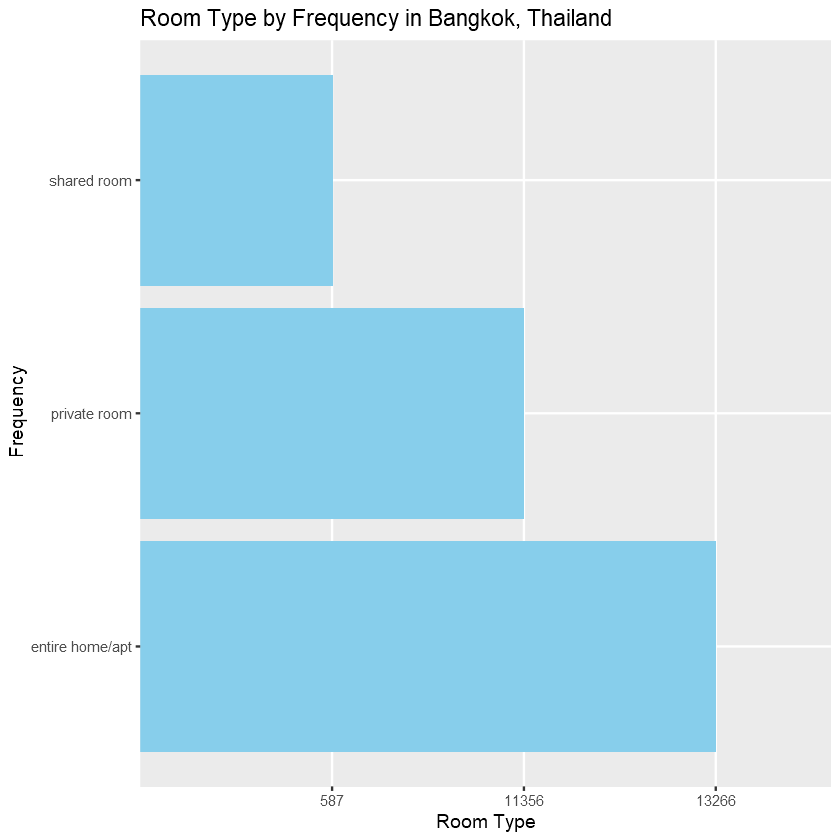

In [136]:
# plotting the room frequencies 
room_frequencies %>% 
  ggplot(aes(x = room_type, 
             y = count %>% reorder(count))
         ) +
  geom_col(fill = "skyblue") +
  labs(x = "Frequency",
       y = "Room Type",
       title = "Room Type by Frequency in Bangkok, Thailand") + 
coord_flip ()

###### The room type with most listings is Entire home / apt.

#### 4. Earliest and most recent review date

In [137]:
reviews <- reviews %>%
mutate(last_review = anydate(last_review),X = NULL) 

In [138]:
head(reviews,1)

listing_id,host_name,last_review
2595,Jennifer,2019-05-21


In [139]:
# create first reviewed , earliest review date 
first_reviewed = min(reviews$last_review)

In [140]:
# create last reviewed , the most recent review date 
last_reviewed = max(reviews$last_review)

In [141]:
# printing earliest & most recent review date 
print(paste("The latest Airbnb review is",last_reviewed,"& The most recent Airbnb review is",first_reviewed))

[1] "The latest Airbnb review is 2019-07-09 & The most recent Airbnb review is 2019-01-01"


#### 5. Joining and cleaning Data frames

In [142]:
# joining prices and room_types 
rooms_and_prices <- merge(prices,room_types,by="listing_id")
str(rooms_and_prices)

Classes 'data.table' and 'data.frame':	25202 obs. of  6 variables:
 $ listing_id : int  2595 3831 5099 5178 5238 5295 5441 5803 6021 6848 ...
 $ price      : num  225 89 200 79 150 135 85 89 85 140 ...
 $ currency   : chr  "dollars" "dollars" "dollars" "dollars" ...
 $ nbhood_full: Factor w/ 217 levels "Bronx, Allerton",..: 113 62 115 107 98 125 107 91 125 94 ...
 $ description: chr  "Skylit Midtown Castle" "Cozy Entire Floor of Brownstone" "Large Cozy 1 BR Apartment In Midtown East" "Large Furnished Room Near B'way" ...
 $ room_type  : Factor w/ 3 levels "entire home/apt",..: 1 1 1 2 1 1 2 2 2 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "listing_id"


In [143]:
# another merge 
airbnb_merged <- merge(rooms_and_prices,reviews,by="listing_id")
str(airbnb_merged)

Classes 'data.table' and 'data.frame':	25202 obs. of  8 variables:
 $ listing_id : int  2595 3831 5099 5178 5238 5295 5441 5803 6021 6848 ...
 $ price      : num  225 89 200 79 150 135 85 89 85 140 ...
 $ currency   : chr  "dollars" "dollars" "dollars" "dollars" ...
 $ nbhood_full: Factor w/ 217 levels "Bronx, Allerton",..: 113 62 115 107 98 125 107 91 125 94 ...
 $ description: chr  "Skylit Midtown Castle" "Cozy Entire Floor of Brownstone" "Large Cozy 1 BR Apartment In Midtown East" "Large Furnished Room Near B'way" ...
 $ room_type  : Factor w/ 3 levels "entire home/apt",..: 1 1 1 2 1 1 2 2 2 1 ...
 $ host_name  : Factor w/ 7361 levels "'Cil","-TheQueensCornerLot",..: 3117 4045 1264 6272 795 3917 3530 3870 1333 282 ...
 $ last_review: Date, format: "2019-05-21" "2019-07-05" ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "listing_id"


In [144]:
# dropping missing values 
airbnb_merged_clean <- na.omit(airbnb_merged)
str(airbnb_merged_clean)

Classes 'data.table' and 'data.frame':	25184 obs. of  8 variables:
 $ listing_id : int  2595 3831 5099 5178 5238 5295 5441 5803 6021 6848 ...
 $ price      : num  225 89 200 79 150 135 85 89 85 140 ...
 $ currency   : chr  "dollars" "dollars" "dollars" "dollars" ...
 $ nbhood_full: Factor w/ 217 levels "Bronx, Allerton",..: 113 62 115 107 98 125 107 91 125 94 ...
 $ description: chr  "Skylit Midtown Castle" "Cozy Entire Floor of Brownstone" "Large Cozy 1 BR Apartment In Midtown East" "Large Furnished Room Near B'way" ...
 $ room_type  : Factor w/ 3 levels "entire home/apt",..: 1 1 1 2 1 1 2 2 2 1 ...
 $ host_name  : Factor w/ 7361 levels "'Cil","-TheQueensCornerLot",..: 3117 4045 1264 6272 795 3917 3530 3870 1333 282 ...
 $ last_review: Date, format: "2019-05-21" "2019-07-05" ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr "listing_id"


In [145]:
# sum of duplicated values 
sum(duplicated(airbnb_merged_clean))
nrow(airbnb_merged_clean[duplicated(airbnb_merged_clean), ])

[1] 0

[1] 0

#### 6. Analyzing listing prices by Borough

In [146]:
# Analyzing listing prices by NYC Borough 
head(airbnb_merged_clean$nbhood_full,5)

[1] Manhattan, Midtown        Brooklyn, Clinton Hill   
[3] Manhattan, Murray Hill    Manhattan, Hell's Kitchen
[5] Manhattan, Chinatown     
217 Levels: Bronx, Allerton Bronx, Baychester ... Staten Island, Willowbrook

In [147]:
airbnb_merged_clean$nbhood_full <- as.character(airbnb_merged_clean$nbhood_full)

In [148]:
airbnb_merged_clean <- airbnb_merged_clean %>%
separate(nbhood_full,into=c("borough","resto"),sep=",")

Warning message:
"Expected 2 pieces. Additional pieces discarded in 1 rows [21958]."


In [149]:
str(airbnb_merged_clean)

Classes 'data.table' and 'data.frame':	25184 obs. of  9 variables:
 $ listing_id : int  2595 3831 5099 5178 5238 5295 5441 5803 6021 6848 ...
 $ price      : num  225 89 200 79 150 135 85 89 85 140 ...
 $ currency   : chr  "dollars" "dollars" "dollars" "dollars" ...
 $ borough    : chr  "Manhattan" "Brooklyn" "Manhattan" "Manhattan" ...
 $ resto      : chr  " Midtown" " Clinton Hill" " Murray Hill" " Hell's Kitchen" ...
 $ description: chr  "Skylit Midtown Castle" "Cozy Entire Floor of Brownstone" "Large Cozy 1 BR Apartment In Midtown East" "Large Furnished Room Near B'way" ...
 $ room_type  : Factor w/ 3 levels "entire home/apt",..: 1 1 1 2 1 1 2 2 2 1 ...
 $ host_name  : Factor w/ 7361 levels "'Cil","-TheQueensCornerLot",..: 3117 4045 1264 6272 795 3917 3530 3870 1333 282 ...
 $ last_review: Date, format: "2019-05-21" "2019-07-05" ...


In [151]:
airbnb_merged_clean %>% 
group_by(borough) %>%
summarize(count=n(),avg.price=mean(price),min.price = min(price),max.price=max(price))

borough,count,avg.price,min.price,max.price
Bronx,696,79.24713,20,670
Brooklyn,10451,122.02182,10,7500
Manhattan,10315,184.04430,10,5100
Queens,3455,92.82634,10,2600
Staten Island,267,86.04494,13,300


###### The boroughs  with lowest prices are : Brooklyn , Manhattan , Queens while the one with most expensive airbnb listing is Brooklyn.

In [157]:
airbnb_merged_clean <- airbnb_merged_clean %>%
mutate(avg.price = mean(price))

#### 7. Analyzing Room type frequency by NYC Borough

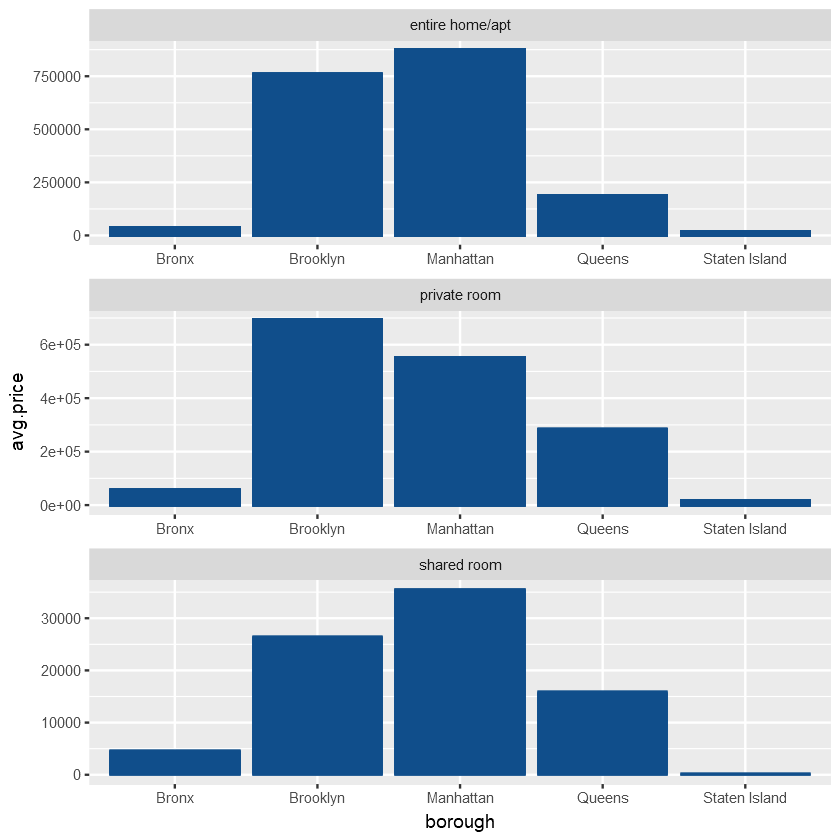

In [165]:
ggplot(airbnb_merged_clean,aes(x=borough,y=avg.price)) + 
geom_col(color="dodgerblue4") + facet_wrap(~room_type, ncol=1, scales="free")

#### 8. Analyzing The top 10 and bottom 10 listings by price.

In [187]:
airbnb_merged_clean$avg.price <- NULL

In [193]:
# property type by average price 
byprice <-  airbnb_merged_clean %>% 
select(description,price)%>%
group_by(description) %>% 
arrange(desc(price))

In [195]:
top10 <- byprice[-1:10,]

In [196]:
top10 <- top10 %>% 
mutate(type="Top 10")

In [197]:
byprice2 <-  airbnb_merged_clean %>% 
select(description,price)%>%
group_by(description) %>% 
arrange((price))

In [199]:
bottom10 <- byprice2[1:10,] 

In [200]:
bottom10 <- bottom10 %>% 
mutate(type = "Bottom 10")

In [201]:
airbnb_price_rank <- top10 %>% 
bind_rows(bottom10)

In [209]:
bottom10

description,price,type
IT'S SIMPLY CONVENIENT!,10,Bottom 10
Spacious 2-bedroom Apt in Heart of Greenpoint,10,Bottom 10
Cozy feel at home studio,10,Bottom 10
Voted #1 Airbnb In NYC,10,Bottom 10
"Charming, bright and brand new Bed-Stuy home",10,Bottom 10
Beautiful room in Bushwick,10,Bottom 10
Spacious and Modern 2 Bedroom Apartment,11,Bottom 10
Private Bedroom in West Village/Chelsea,12,Bottom 10
Happy Home 3,13,Bottom 10
"trip NYC - your Couch - clean, cheap, close to all",15,Bottom 10


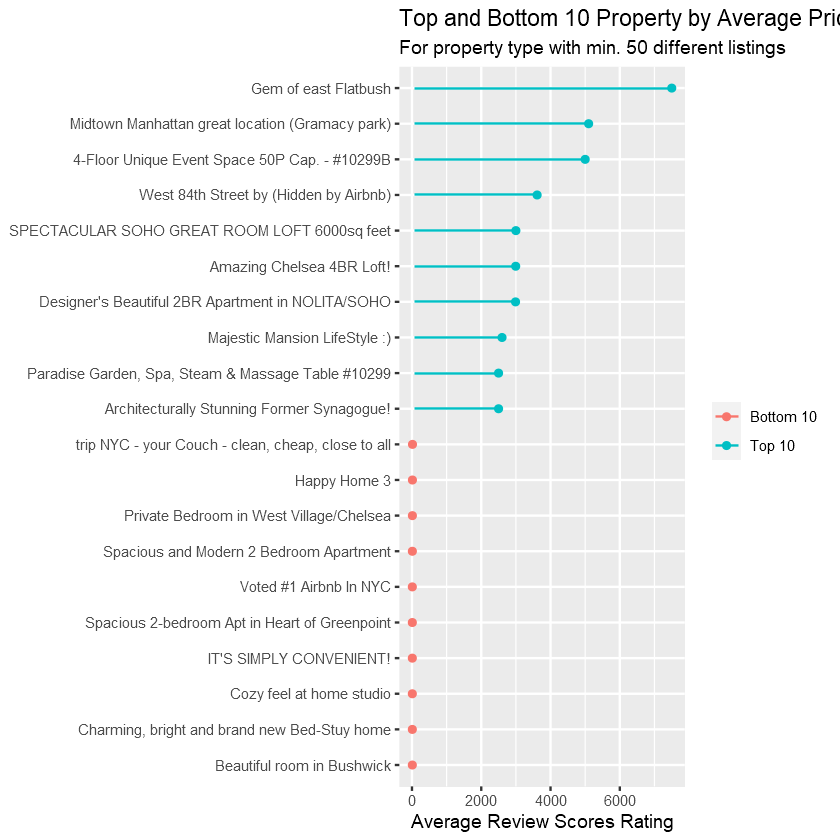

In [211]:
airbnb_price_rank %>% 
  ggplot(aes(x = price, 
             y = description %>% reorder(price),
             color = type)
         ) + 
  geom_point() +
  geom_segment(aes(xend = 80, yend = description)) +
  labs(x = "Average Review Scores Rating",
       y = NULL,
       color = NULL,
       title = "Top and Bottom 10 Property by Average Price",
       subtitle = "For property type with min. 50 different listings") 

#### 9. Analyzing the price range by Borough : classifying the listings by price range into : Budegt , Average , Expensive and Extravagant.

If the listing's price is below or equal to 69 is categorized as : Budget , if it is between 70 and 175 , it is then categorized as Average , between 176 and 350 is categorized as Expensive. Any listing with a price higher than 350 is Extravagant.

In [216]:
# price range by borough 
price_ranges <- airbnb_merged_clean %>% 
mutate(price_range = case_when (
    price <= 69 ~ "Budget",
    price >= 70 & price <= 175 ~ "Average", 
    price >= 176 & price <= 350 ~ "Expensive", 
    price > 350 ~ "Extravagant"))

In [224]:
# count per price range 
price_ranges <- price_ranges %>% 
group_by(borough,price_range)%>% 
summarize(count_range=n())

`summarise()` has grouped output by 'borough'. You can override using the `.groups` argument.



Warning message:
"Ignoring unknown parameters: stat"


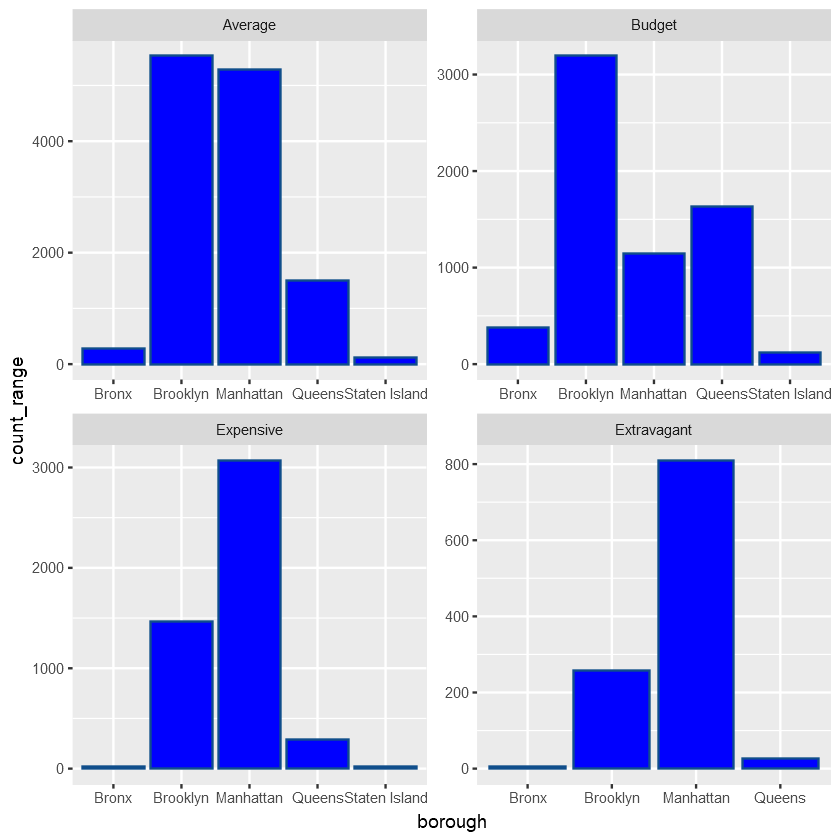

In [228]:
ggplot(price_ranges,aes(x=borough,y=count_range)) + 
geom_col(stat="identity",color="dodgerblue4",fill="blue") + facet_wrap(~price_range, scales="free")

##### The NYC Borough with the most listings within the average price range are in Brooklyn and Manhattan , while the NYC borough with the most Expensive and Extravagant listing are also in Manhattan and Brooklyn. Therefore we can conclude that Brooklyn and Manhattan have a wide variety of options within different price ranges.